In [69]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [70]:
# Training and testing sets for KNN, SVM, Random Forest and CNN


# Image Data Generation with augmentation for training
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Image Data Generation for testing (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory for training data
# Since we're using RNN, we need to ensure we have a sequence of images per sample
training_set = train_datagen.flow_from_directory('./dataset/training_set/',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary',
                                                 color_mode='rgb')

# Flow from directory for testing data
test_set = test_datagen.flow_from_directory('./dataset/test_set/',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary',
                                            color_mode='rgb')

Found 364 images belonging to 2 classes.


Found 137 images belonging to 2 classes.


In [ ]:
# Convolutional Neural Network (CNN)
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn.fit(x=training_set, validation_data=test_set, epochs=30)
cnn.save('model1.h5')



Epoch 1/30
12/12 [==============================] - 4s 228ms/step - loss: 0.3443 - accuracy: 0.8434 - val_loss: 0.3177 - val_accuracy: 0.8686
Epoch 2/30
12/12 [==============================] - 2s 179ms/step - loss: 0.1047 - accuracy: 0.9670 - val_loss: 0.0994 - val_accuracy: 0.9635
Epoch 3/30
12/12 [==============================] - 3s 233ms/step - loss: 0.1091 - accuracy: 0.9533 - val_loss: 0.0793 - val_accuracy: 0.9708
Epoch 4/30
12/12 [==============================] - 3s 241ms/step - loss: 0.0999 - accuracy: 0.9588 - val_loss: 0.0123 - val_accuracy: 0.9927
Epoch 5/30
12/12 [==============================] - 4s 334ms/step - loss: 0.0405 - accuracy: 0.9835 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 6/30
12/12 [==============================] - 3s 244ms/step - loss: 0.0186 - accuracy: 0.9918 - val_loss: 0.0276 - val_accuracy: 0.9927
Epoch 7/30
12/12 [==============================] - 3s 237ms/step - loss: 0.0174 - accuracy: 0.9945 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 

In [ ]:
#RNN Model
# Set image dimensions and parameters
height = 64         # Image height
width = 64          # Image width
channels = 3        # RGB images (3 channels)
batch_size = 32     # Batch size for training and testing

# Image Data Generation with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,      # Normalize pixel values to [0, 1]
    shear_range=0.2,     # Shear augmentation
    zoom_range=0.2,      # Zoom augmentation
    horizontal_flip=True # Horizontal flip augmentation
)

# Image Data Generation for testing (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory for training data
train_generator_rnn = train_datagen.flow_from_directory(
    './dataset/training_set/',  # Path to training images
    target_size=(height, width), # Resize images to 64x64
    batch_size=batch_size,
    class_mode='binary'  # Binary classification (lung cancer: yes/no)
)

# Flow from directory for testing data
test_generator = test_datagen.flow_from_directory(
    './dataset/test_set/',  # Path to test images
    target_size=(height, width), # Resize images to 64x64
    batch_size=batch_size,
    class_mode='binary'  # Binary classification (lung cancer: yes/no)
)

# Define the RNN model for lung cancer diagnosis from X-ray images
rnn_model = tf.keras.models.Sequential([
    # CNN layers for feature extraction from each image
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(height, width, channels)),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),

    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),

    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),

    # Flatten the CNN output to pass it into the LSTM layer
    tf.keras.layers.Flatten(),

    # Reshape CNN output to fit LSTM (this may be conceptual)
    # This Reshape is done for the LSTM layer to expect input in the form (timesteps, features)
    # Here we treat each feature in the flattened image as a "time-step" for the LSTM to process
    tf.keras.layers.Reshape((1, -1)),  # Reshape to (1, features) for a single image

    # LSTM layer for sequence processing
    tf.keras.layers.LSTM(units=64, activation='relu', return_sequences=False),

    # Fully connected layer for classification
    tf.keras.layers.Dense(units=128, activation='relu'),

    # Output layer for binary classification (lung cancer or not)
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # Sigmoid for binary output
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary to see the architecture
rnn_model.summary()

# Train the model
rnn_model.fit(
    x=train_generator_rnn,
    validation_data=test_generator,
    epochs=30,
    steps_per_epoch=train_generator_rnn.samples // train_generator_rnn.batch_size,
    validation_steps=test_generator.samples // test_generator.batch_size
)
rnn_model.save('rnn_model.h5')

Found 364 images belonging to 2 classes.
Found 137 images belonging to 2 classes.
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 12, 12, 128)       73856     
                                      

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [73]:
# Transformer Model
# Set image dimensions and parameters
height = 64         # Image height
width = 64          # Image width
channels = 3        # RGB images (3 channels)
batch_size = 32     # Batch size for training and testing

# Image Data Generation with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,      # Normalize pixel values to [0, 1]
    shear_range=0.2,     # Shear augmentation
    zoom_range=0.2,      # Zoom augmentation
    horizontal_flip=True # Horizontal flip augmentation
)

# Image Data Generation for testing (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory for training data
train_generator_transformer = train_datagen.flow_from_directory(
    './dataset/training_set/',  # Path to training images
    target_size=(height, width), # Resize images to 64x64
    batch_size=batch_size,
    class_mode='binary'  # Binary classification (lung cancer: yes/no)
)

# Flow from directory for testing data
test_generator_transformer = test_datagen.flow_from_directory(
    './dataset/test_set/',  # Path to test images
    target_size=(height, width), # Resize images to 64x64
    batch_size=batch_size,
    class_mode='binary'  # Binary classification (lung cancer: yes/no)
)

# Vision Transformer (ViT) Model for lung cancer diagnosis from X-ray images

def create_vit_model(input_shape):
    # Input layer
    inputs = tf.keras.layers.Input(shape=input_shape)

    # Patch Embedding (split image into patches)
    x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(inputs)  # Convolution to create patches
    x = tf.keras.layers.Reshape((-1, 64))(x)  # Flatten patches into sequences

    # Transformer block
    # Attention Layer
    attention = tf.keras.layers.MultiHeadAttention(num_heads=4, key_dim=64)(x, x)
    x = tf.keras.layers.Add()([x, attention])
    x = tf.keras.layers.LayerNormalization()(x)

    # Feed Forward Network (FFN)
    ffn = tf.keras.layers.Dense(128, activation='relu')(x)
    ffn = tf.keras.layers.Dense(64, activation='relu')(ffn)
    x = tf.keras.layers.Add()([x, ffn])
    x = tf.keras.layers.LayerNormalization()(x)

    # Pooling Layer
    x = tf.keras.layers.GlobalAveragePooling1D()(x)

    # Fully connected layers
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)

    # Output layer for binary classification
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    # Create and compile the model
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create the ViT model
vit_model = create_vit_model(input_shape=(height, width, channels))

# Print the model summary
vit_model.summary()

# Fit the model using the custom generators
vit_model.fit(
    x=train_generator_transformer ,
    validation_data=test_generator_transformer,
    epochs=30,
    steps_per_epoch=train_generator_transformer .samples // train_generator_transformer.batch_size,
    validation_steps=test_generator_transformer.samples // test_generator_transformer.batch_size
)
vit_model.save('model.h5')



Found 364 images belonging to 2 classes.
Found 137 images belonging to 2 classes.
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv2d_18 (Conv2D)          (None, 32, 32, 64)           1792      ['input_4[0][0]']             
                                                                                                  
 reshape_6 (Reshape)         (None, 1024, 64)             0         ['conv2d_18[0][0]']           
                                                                                                  
 multi_head_attention_3 (Mu  (None, 1024, 64)             66368     ['reshape_6[0][0]',           
 ltiHeadAt

In [74]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(training_set[0][0].reshape(training_set[0][0].shape[0], -1), training_set[0][1])


RandomForestClassifier(random_state=42)

In [75]:
# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear', random_state=42, probability=True)
svm_classifier.fit(training_set[0][0].reshape(training_set[0][0].shape[0], -1), training_set[0][1])

SVC(kernel='linear', probability=True, random_state=42)

In [76]:
# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(training_set[0][0].reshape(training_set[0][0].shape[0], -1), training_set[0][1])

KNeighborsClassifier()

In [77]:
# Predictions
cnn_predictions = cnn.predict(test_set, verbose=0)
rf_predictions = rf_classifier.predict_proba(test_set[0][0].reshape(test_set[0][0].shape[0], -1))[:, 1]
svm_predictions = svm_classifier.predict_proba(test_set[0][0].reshape(test_set[0][0].shape[0], -1))[:, 1]
knn_predictions = knn_classifier.predict_proba(test_set[0][0].reshape(test_set[0][0].shape[0], -1))[:, 1]
rnn_predictions = rnn_model.predict(test_generator, verbose=0)
vit_predictions = vit_model.predict(test_generator_transformer,verbose=0)


In [78]:
rf_accuracy = rf_classifier.score(test_set[0][0].reshape(test_set[0][0].shape[0], -1), test_set[0][1])
svm_accuracy = svm_classifier.score(test_set[0][0].reshape(test_set[0][0].shape[0], -1), test_set[0][1])
knn_accuracy = knn_classifier.score(test_set[0][0].reshape(test_set[0][0].shape[0], -1), test_set[0][1])
print(rf_accuracy,svm_accuracy,knn_accuracy)

1.0 0.84375 0.875


In [79]:
# Accuracy comparison
cnn_accuracy = cnn.evaluate(test_set)[1]
rnn_accuracy = rnn_model.evaluate(test_generator)[1]
vit_accuracy = vit_model.evaluate(test_generator_transformer)[1]
print(cnn_accuracy, rnn_accuracy, vit_accuracy)

5/5 [==============================] - 7s 1s/step - loss: 0.0037 - accuracy: 1.0000
1.0 1.0 1.0


In [80]:
# ROC Curve for CNN
fpr_cnn, tpr_cnn, _ = roc_curve(test_set.classes, cnn_predictions)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

In [81]:
fpr_rnn, tpr_rnn, _ = roc_curve(test_generator.classes, rnn_predictions)
roc_auc_rnn = auc(fpr_rnn, tpr_rnn)

In [82]:
fpr_transformer, tpr_transformer, _ = roc_curve(test_generator_transformer.classes, vit_predictions)
roc_auc_transformer = auc(fpr_transformer, tpr_transformer)

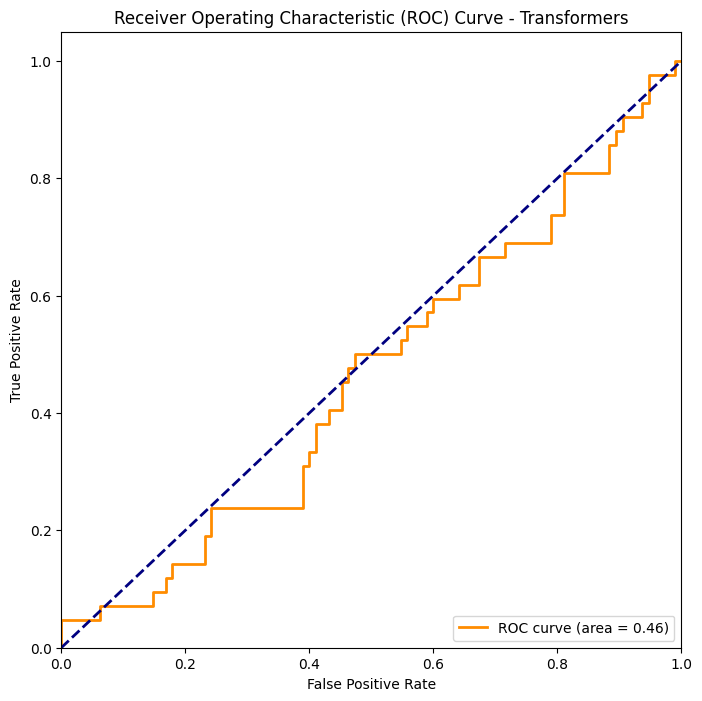

In [83]:
plt.figure(figsize=(8, 8))
plt.plot(fpr_transformer, tpr_transformer, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_transformer)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Transformers')
plt.legend(loc="lower right")
plt.show()

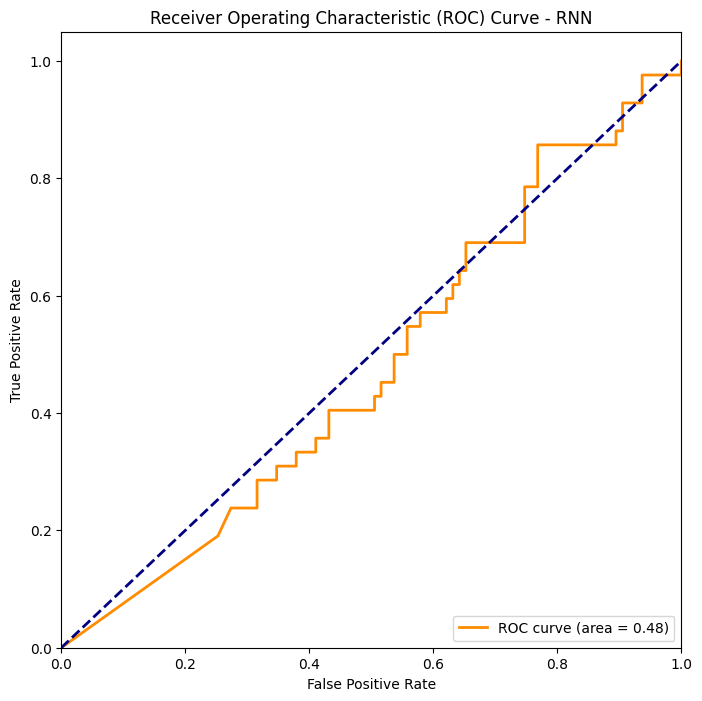

In [84]:
plt.figure(figsize=(8, 8))
plt.plot(fpr_rnn, tpr_rnn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rnn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - RNN')
plt.legend(loc="lower right")
plt.show()

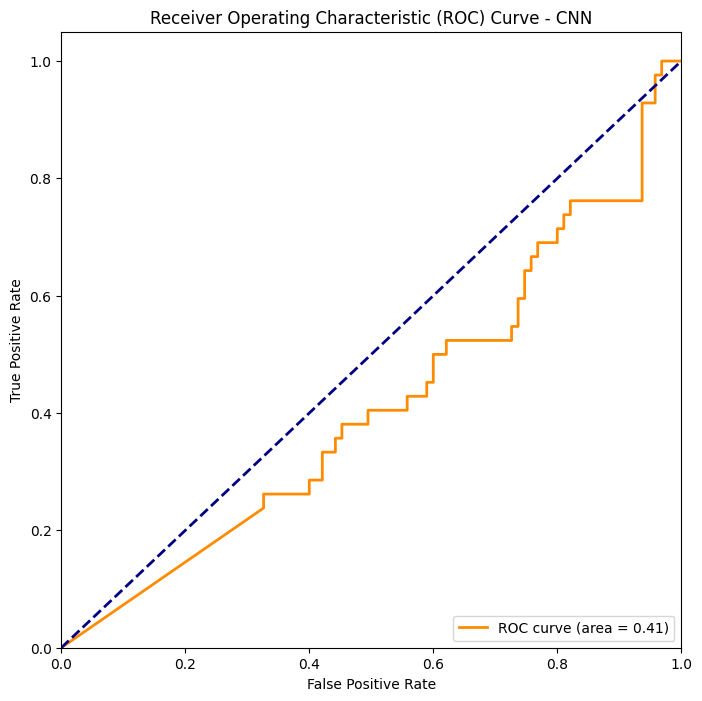

In [85]:
# Plot ROC Curve for CNN
plt.figure(figsize=(8, 8))
plt.plot(fpr_cnn, tpr_cnn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_cnn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - CNN')
plt.legend(loc="lower right")
plt.show()

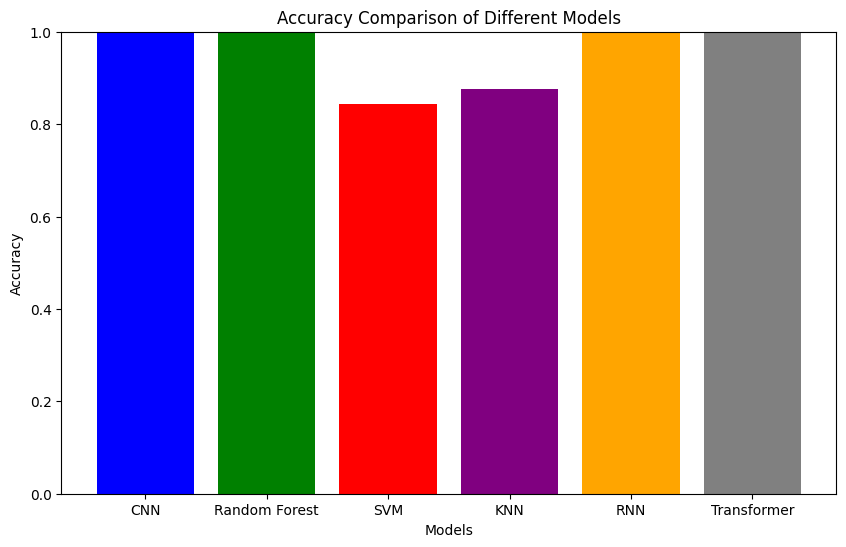

In [86]:
# Accuracy Comparison Graph
models = ['CNN', 'Random Forest', 'SVM', 'KNN','RNN','Transformer']
accuracies = [cnn_accuracy, rf_accuracy, svm_accuracy, knn_accuracy,rnn_accuracy,vit_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple','orange','gray'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)
plt.show()

In [ ]:
#Prediction using CNN
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/Non-Cancerous141.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Normal'
else:
  prediction = 'Cancer'

print(prediction)


1/1 [==============================] - 0s 27ms/step
Normal


In [108]:
##CNN
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize lists to store true labels and predicted labels
y_true = []
y_pred = []

# Make predictions on the test set
for batch in test_set:
    # Get true labels (from the batch)
    true_labels = batch[1]
    y_true.extend(true_labels)

    # Get model predictions (probabilities)
    pred_prob = cnn.predict(batch[0], batch_size=32)
    pred_labels = (pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

    # Extend the predictions list
    y_pred.extend(pred_labels.flatten())

    # Stop if we have processed all samples
    if len(y_true) >= test_set.samples:
        break

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Print the shapes of y_true and y_pred to ensure they match
print("y_true shape:", y_true.shape)
print("y_pred shape:", y_pred.shape)

# Calculate Precision, Recall, and F1 Score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
cnn_confusion_matrix = confusion_matrix(y_true,y_pred)
# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"confusion_matrix:{cnn_confusion_matrix}")

1/1 [==============================] - 0s 32ms/step
y_true shape: (137,)
y_pred shape: (137,)
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
confusion_matrix:[[95  0]
 [ 0 42]]


In [ ]:
#RNN
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Initialize lists to store true labels and predicted labels
y_true = []
y_pred = []

# Make predictions on the test set
for batch in test_generator:
    # Get true labels (from the batch)
    true_labels = batch[1]
    y_true.extend(true_labels)

    # Get model predictions (probabilities)
    pred_prob = rnn_model.predict(batch[0], batch_size=batch_size)
    pred_labels = (pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

    # Extend the predictions list
    y_pred.extend(pred_labels.flatten())

    # Stop if we have processed all samples
    if len(y_true) >= test_generator.samples:
        break

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Print the shapes of y_true and y_pred to ensure they match
print("y_true shape:", y_true.shape)
print("y_pred shape:", y_pred.shape)

# Calculate Precision, Recall, and F1 Score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
rnn_confusion_matrix = confusion_matrix(y_true,y_pred)

# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"confusion_matrix:{rnn_confusion_matrix}")

1/1 [==============================] - 0s 34ms/step
y_true shape: (137,)
y_pred shape: (137,)
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
confusion_matrix:[[95  0]
 [ 0 42]]


In [ ]:
## Transformers
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize lists to store true labels and predicted labels
y_true = []
y_pred = []

# Make predictions on the test set
for batch in test_generator_transformer:
    # Get true labels (from the batch)
    true_labels = batch[1]
    y_true.extend(true_labels)

    # Get model predictions (probabilities)
    pred_prob = vit_model.predict(batch[0], batch_size=batch_size)
    pred_labels = (pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

    # Extend the predictions list
    y_pred.extend(pred_labels.flatten())

    # Stop if we have processed all samples
    if len(y_true) >= test_generator_transformer.samples:
        break

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Print the shapes of y_true and y_pred to ensure they match
print("y_true shape:", y_true.shape)
print("y_pred shape:", y_pred.shape)

# Calculate Precision, Recall, and F1 Score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
vit_confusion_matrix = confusion_matrix(y_true,y_pred)
# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"confusion_matrix:{vit_confusion_matrix}")

1/1 [==============================] - 1s 624ms/step
y_true shape: (137,)
y_pred shape: (137,)
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
confusion_matrix:[[95  0]
 [ 0 42]]
